In [1]:
print ( "Hello World!")

Hello World!


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from dateutil.parser import parse 
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter('ignore', np.RankWarning)

In [4]:
df = pd.read_csv("/Users/ms/Desktop/Boot Camp /3rd Project/Bike-Sharing-Dataset/day.csv" )

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [209]:
df.isnull().sum()


instant           0
dteday            0
season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
real_hum          0
real_windspeed    0
dtype: int64

In [6]:
# convert the Temprutre to Celsius , humidity and windspeed  

t_min= -8
t_max=39
t_min_a=16
t_max_a= -50

df['temp'] = df['temp'] * (t_max-t_min) + t_min 
df['atemp'] = df['atemp'] *  (t_max_a-t_min_a) + t_min_a
df['real_hum']= df['hum']*100
df['real_windspeed']= df['windspeed']*67

In [9]:
# conversion date type from object to timestamp.

df['dteday'] = pd.to_datetime(df['dteday'])

Coefficients: [138.20753507]
Intercept: 2427.1224209994625
Mean squared error (MSE): 1881032.41
Coefficient of determination (R^2): 0.49


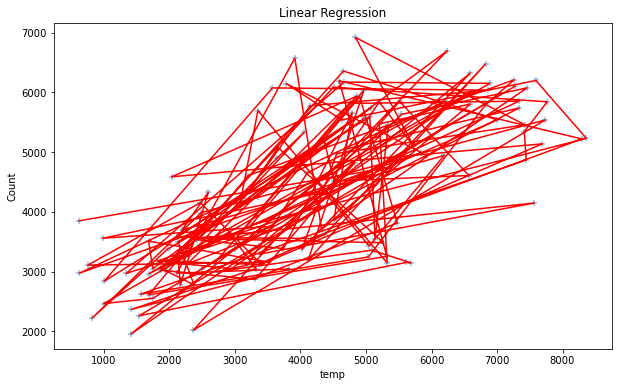

In [64]:
# split dataset to  X , Y variables, which we gonna model it 
y = df['cnt']
X = df['temp']

# Perform 80/20 Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# reshape because the features are not 2D array
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)


# LinearRegression Model 
from sklearn import linear_model
lin = linear_model.LinearRegression()

# Build training model
lin.fit(X_train, y_train)

# Apply trained model to make prediction (on test set)
y_pred = lin.predict(X_test)


# Predection result
print('Coefficients:', lin.coef_)
print('Intercept:', lin.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


# Visualising the Linear Regression results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, marker="+", alpha=0.5)
plt.plot(y_test, y_pred, color = 'red')


plt.title('Linear Regression')
plt.xlabel('temp')
plt.ylabel('Count')
plt.show()




***Polynomial Regression*** / Model Building

RMSE Train: 1384.08,  Test: 1552.03
R^2 Train: 0.47,  Test: 0.43


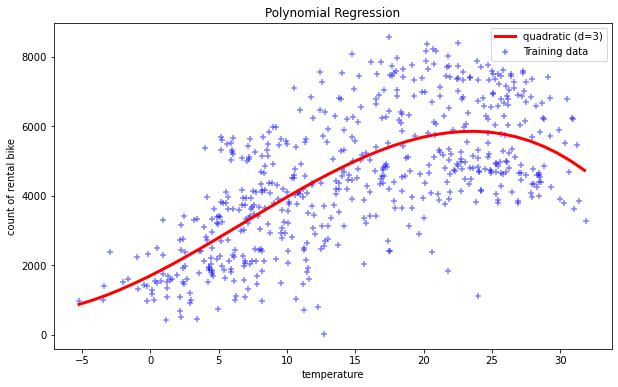

In [67]:
# independent variable
X = df["temp" ] # temperature
# depandent variable
y = df["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 3,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=3)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE Train: 1234.45,  Test: 1334.42
R^2 Train: 0.35,  Test: 0.35


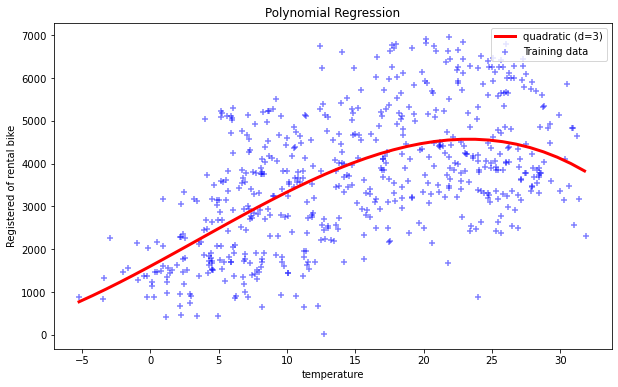

In [68]:
# independent variable
X = df["temp" ] # temperature
# depandent variable
y = df["registered"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 3,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=3)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('temperature')
plt.ylabel('Registered of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE Train: 544.81,  Test: 622.11
R^2 Train: 0.35,  Test: 0.27


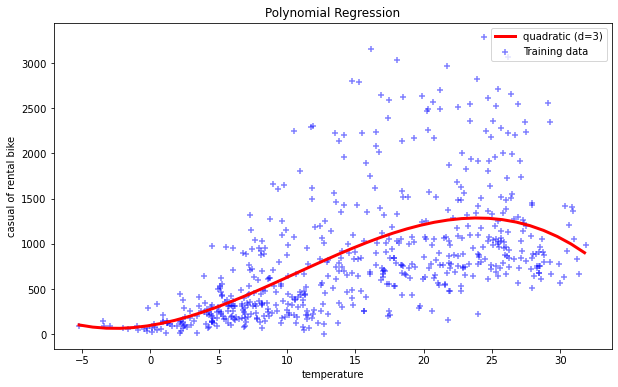

In [69]:
# independent variable
X = df["temp" ] # temperature
# depandent variable
y = df["casual"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 3,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=3)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('temperature')
plt.ylabel('casual of rental bike')
plt.legend(loc='upper right')
plt.show()

Coefficients: [138.20753507]
Intercept: 2427.1224209994625
Mean squared error (MSE): 1881032.41
Coefficient of determination (R^2): 0.49


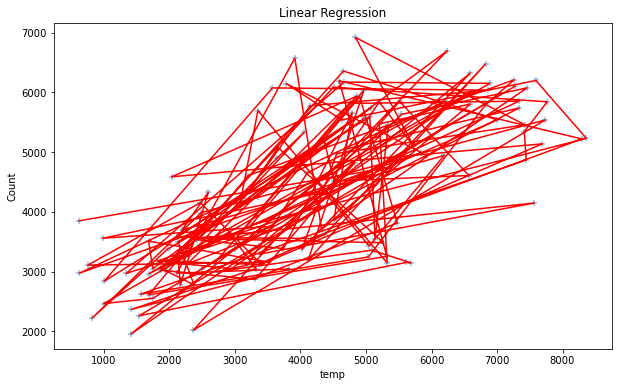

In [70]:
# split dataset to  X , Y variables, which we gonna model it 
y = df['cnt']
X = df['temp']

# Perform 80/20 Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# reshape because the features are not 2D array
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)


# LinearRegression Model 
from sklearn import linear_model
lin = linear_model.LinearRegression()

# Build training model
lin.fit(X_train, y_train)

# Apply trained model to make prediction (on test set)
y_pred = lin.predict(X_test)


# Predection result
print('Coefficients:', lin.coef_)
print('Intercept:', lin.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


# Visualising the Linear Regression results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, marker="+", alpha=0.5)
plt.plot(y_test, y_pred, color = 'red')


plt.title('Linear Regression')
plt.xlabel('temp')
plt.ylabel('Count')
plt.show()




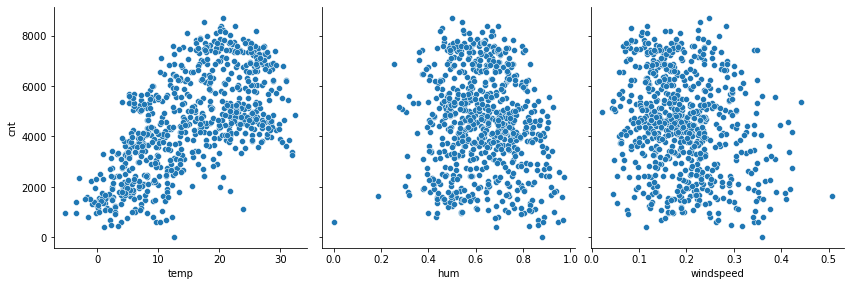

In [73]:
#How Count are related with other variables
sns.pairplot(df, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt', height=4, aspect=1, kind='scatter')
plt.show()


/Users/ms/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ms/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ms/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

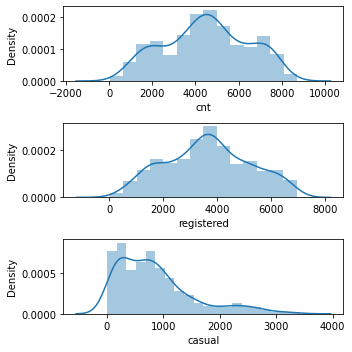

In [84]:
# Distribution of the target variable
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.distplot(df['cnt'], ax = axs[0])
plt2 = sns.distplot(df['registered'], ax = axs[1])
plt3 = sns.distplot(df['casual'], ax = axs[2])
plt.tight_layout()


# *****Simple Linear Regression***** / Model Building

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Setting the value for X and Y
X = df[['temp']]
y = df['cnt']

#plitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Implementing the linear model
#Fitting the  Linear Regression model
from sklearn.linear_model import LinearRegression
slr= LinearRegression()  
slr.fit(X_train, y_train)


#Printing the model Intercept and Coefficient
print('Intercept: ', '%.2f' % slr.intercept_)
print('Coefficient:', slr.coef_)
print('Regression Equation: Count =', '%.2f' % slr.intercept_ , '+',  slr.coef_ , '*',  'Tempreture')

# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f} '.format(slr.score(X,y)*100))





Intercept:  2320.58
Coefficient: [145.03360143]
Regression Equation: Count = 2320.58 + [145.03360143] * Tempreture
R squared value of the model: 39.32 


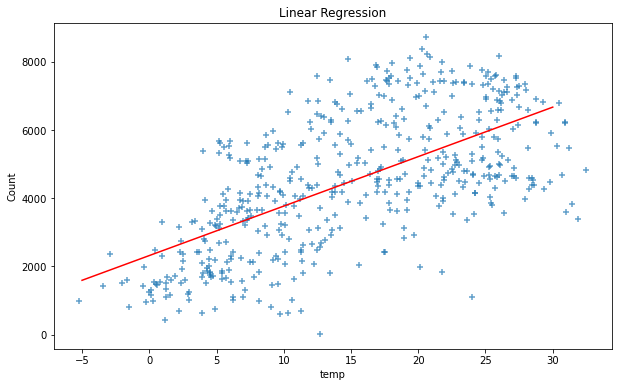

In [146]:
#Line of best fit
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, marker="+", alpha=0.7)

X_plot = np.linspace(-5, 30, 100)
Y_plot = 2320.58 + 145.03*X_plot
plt.plot(X_plot, Y_plot, color='r')
plt.title('Linear Regression')
plt.xlabel('temp')
plt.ylabel('Count')
plt.show()


In [107]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(X_test)  
X_pred_slr= slr.predict(X_train)  
#Predicted values
print("Prediction for test set: {}".format(y_pred_slr))

#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':  y_pred_slr})
slr_diff


Prediction for test set: [6113.69383177 5852.38708214 4364.10288104 6386.35700245 6034.16480146
 2966.7041313  6250.02541711 5801.26273764 5863.75031978 6397.7134235
 5625.17004544 6147.7767281  5216.17528942 3869.90088418 4312.97853654
 5937.59432298 6051.20624962 2144.27020958 3500.66723502 4528.83915218
 5829.66742345 5312.74576789 5795.58452711 2943.9844726  5369.54832292
 3608.60095114 5909.19645375 5488.8384601  5591.0871491  6357.95231664
 6454.52279512 5165.05094491 5443.39232612 5119.60481094 4000.55425899
 5295.70431972 6221.6207313  3625.64239931 2683.66612698 4756.05618889
 3818.77653968 4716.29508203 3352.97922862 6948.72479197 4199.36660989
 6460.20100565 3323.83153568 5500.20169773 3188.24295748 3494.98902449
 5579.72391146 6125.05025282 4256.1759815  5005.99970088 2887.17510099
 6539.73003595 3631.32060983 4585.64170722 4841.26342973 3512.03047266
 3534.75013136 6715.82272816 2449.26441572 6306.82797214 3994.86923188
 5585.40893857 5642.2114936  3335.93778046 4636.76605

,Actual value,Predicted value
184,6043,6113.693832
535,6825,5852.387082
299,2659,4364.102881
221,4780,6386.357002
152,4968,6034.164801
...,...,...
702,6234,4244.812744
127,4333,4761.734399
640,4639,5187.770604
72,2046,3377.178085


In [111]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1242.5160845370824
Mean Square Error: 2245350.28368578
Root Mean Square Error: 1498.4492929978578


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Setting the value for X and Y
X = df[['temp']]
y = df['registered']

#plitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Implementing the linear model
#Fitting the  Linear Regression model
from sklearn.linear_model import LinearRegression
slr= LinearRegression()  
slr.fit(X_train, y_train)


#Printing the model Intercept and Coefficient
print('Intercept: ', '%.2f' % slr.intercept_)
print('Coefficient:', slr.coef_)
print('Regression Equation: Count =', '%.2f' % slr.intercept_ , '+',  slr.coef_ , '*',  'Tempreture')

# print the R-squared value for the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f} '.format(slr.score(X,y)*100))

Intercept:  2130.23
Coefficient: [100.47251337]
Regression Equation: Count = 2130.23 + [100.47251337] * Tempreture
R squared value of the model: 29.14 


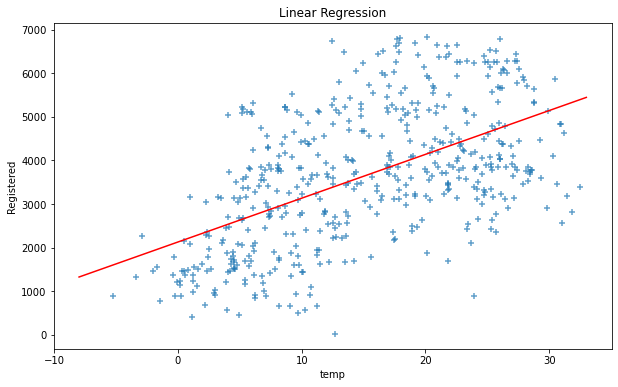

In [152]:
#Line of best fit
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, marker="+", alpha=0.7)

X_plot = np.linspace(-8, 33, 100)
Y_plot = 2130.23+ 100.47*X_plot
plt.plot(X_plot, Y_plot, color='r')
plt.title('Linear Regression')
plt.xlabel('temp')
plt.ylabel('Registered')
plt.show()

In [153]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(X_test)  
X_pred_slr= slr.predict(X_train)  
#Predicted values
print("Prediction for test set: {}".format(y_pred_slr))

#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':  y_pred_slr})
slr_diff


Prediction for test set: [4757.92345471 4576.90232831 3545.88846099 4946.81177985 4702.82945248
 2577.83579465 4852.36761728 4541.48576735 4584.77424926 4954.67897859
 4419.49696477 4781.53449535 4136.16447706 3203.52837168 3510.47190003
 4635.92992992 4714.6349728  2008.09193953 2947.74052398 3660.01006484
 4561.16320862 4203.06399961 4537.55216798 2562.09667496 4242.41415995
 3022.51196749 4616.25721086 4325.0528022  4395.88592412 4927.13433858
 4994.03386114 4100.74791609 4293.5698406  4069.2649545  3294.03893488
 4191.25847929 4832.69017601 3034.31748781 2381.76026874 3817.41542838
 3168.11181071 3789.87078837 2845.42916267 5336.39395045 3431.76685715
 4997.96746051 2825.23700071 4332.92472315 2731.30755883 2943.80692461
 4388.01400317 4765.79065345 3471.1217397  3990.56463383 2522.74179242
 5053.06146274 3038.25108718 3699.36022517 3876.44302999 2955.61244493
 2971.35156462 5175.05026533 2219.37769783 4891.71777762 3290.1006133
 4391.95232475 4431.30248509 2833.62364235 3734.77678

,Actual value,Predicted value
184,2978,4757.923455
535,5857,4576.902328
299,2419,3545.888461
221,3896,4946.811780
152,4232,4702.829452
...,...,...
702,5679,3463.249819
127,2932,3821.349028
640,4324,4116.487036
72,1687,2862.193002


In [154]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1130.0605277569189
Mean Square Error: 1775489.6546010468
Root Mean Square Error: 1332.475010873017


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Setting the value for X and Y
X = df[['temp']]
y = df['casual']

#plitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Implementing the linear model
#Fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
slr= LinearRegression()  
slr.fit(X_train, y_train)


#Printing the model Intercept and Coefficient
print('Intercept: ', '%.2f' % slr.intercept_)
print('Coefficient:', slr.coef_)
print('Regression Equation: Count =', '%.2f' % slr.intercept_ , '+',  slr.coef_ , '*',  'Tempreture')

# print the R-squared value for the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f} '.format(slr.score(X,y)*100))

Intercept:  190.35
Coefficient: [44.56108805]
Regression Equation: Count = 190.35 + [44.56108805] * Tempreture
R squared value of the model: 29.38 


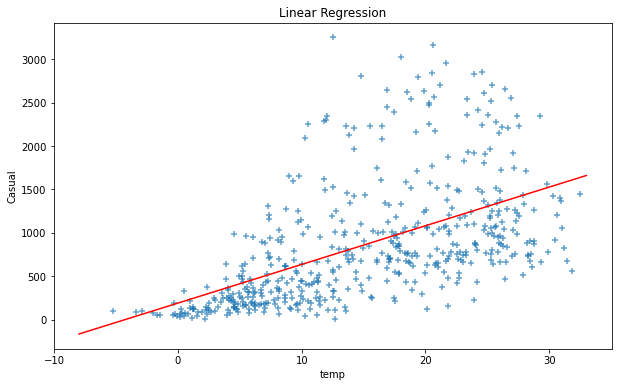

In [156]:
#Line of best fit
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, marker="+", alpha=0.7)

X_plot = np.linspace(-8, 33, 100)
Y_plot = 190.35+ 44.56*X_plot
plt.plot(X_plot, Y_plot, color='r')
plt.title('Linear Regression')
plt.xlabel('temp')
plt.ylabel('Casual')
plt.show()

In [157]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(X_test)  
X_pred_slr= slr.predict(X_train)  
#Predicted values
print("Prediction for test set: {}".format(y_pred_slr))

#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':  y_pred_slr})
slr_diff


Prediction for test set: [1355.77037705 1275.48475383  818.21442004 1439.54522259 1331.33534898
  388.86833665 1397.65779982 1259.77697029 1278.97607052 1443.03444491
 1205.67308067 1366.24223275 1080.01081236  666.3725125   802.50663651
 1301.66439306 1336.57127683  136.17827004  552.92671104  868.82908735
 1268.50421482 1109.68176828 1258.03235913  381.88779764 1127.13416298
  586.08898365 1292.9392429  1163.7856579  1195.20122498 1430.81797806
 1460.48893398 1064.30302882 1149.82248552 1050.33985644  706.51532411
 1104.44584043 1388.93055529  591.3249115   301.90585824  938.64076051
  650.66472896  926.42429366  507.55006596 1612.33084152  767.59975274
 1462.23354514  498.59453497 1167.27697459  456.93539865  551.18209988
 1191.70990829 1359.25959937  785.05424181 1015.43506704  364.43330858
 1486.66857321  593.06952265  886.28148205  964.82039974  556.41802773
  563.39856673 1540.77246283  229.8867179  1415.11019452  704.76861858
 1193.45661382 1210.90900852  502.31413811  901.9892

,Actual value,Predicted value
184,3065,1355.770377
535,968,1275.484754
299,240,818.214420
221,884,1439.545223
152,736,1331.335349
...,...,...
702,555,781.562925
127,1401,940.385372
640,315,1071.283568
72,359,514.985083


In [158]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 404.7585927025083
Mean Square Error: 307193.8987806958
Root Mean Square Error: 554.2507544250128


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Setting the value for X and Y
X = df[['hum']]
y = df['cnt']

#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Implementing the linear model
#Fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
slr= LinearRegression()  
slr.fit(X_train, y_train)


#Printing the model Intercept and Coefficient
print('Intercept: ', '%.2f' % slr.intercept_)
print('Coefficient:', slr.coef_)
print('Regression Equation: Count =', '%.2f' % slr.intercept_ , '+',  slr.coef_ , '*',  'Humidity')

# print the R-squared value for the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f} '.format(slr.score(X,y)*100))

Intercept:  5198.76
Coefficient: [-1111.95739214]
Regression Equation: Count = 5198.76 + [-1111.95739214] * Humidity
R squared value of the model: 0.98 


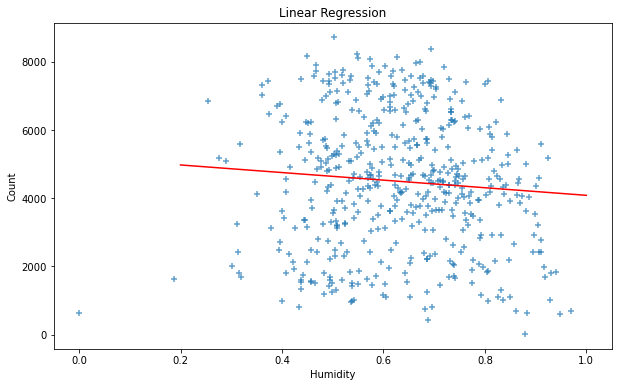

In [164]:
#Line of best fit
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, marker="+", alpha=0.7)

X_plot = np.linspace(0.2, 1, 100)
Y_plot =  5198.76 -1111.95*X_plot
plt.plot(X_plot, Y_plot, color='r')
plt.title('Linear Regression')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

# *****Ridge Regression***** / Model Building

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

#
# Load the Sklearn Boston Dataset
#

X = df[['hum', 'temp', 'windspeed']]
y = df['cnt']
#
# Create a training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 1987208.539, test: 2106291.825
R^2 train: 0.454, test: 0.471


In [168]:
# Note: Ridge Regresiion works with cross Validation to avoid the overfitting of the data 

# *****Multiple Linear Regression***** / Model Building

In [332]:
#Setting the value for X and Y
x = df[['temp', 'hum', 'windspeed']]
y = df['cnt']

#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  

#Implementing the linear model
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 



# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))
#Printing the model coefficients
print('Intercept: ', '%.2f' % mlr.intercept_)
# pair the feature names with the coefficients
print('Coefficient:',list(zip(x,  mlr.coef_)))



#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)  
#print("Prediction for test set: {}".format(y_pred_mlr))

# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

#Predict for any value
#mlr.predict([[56, 55, 67]])


R squared value of the model: 45.94
Intercept:  5271.65
Coefficient: [('temp', 143.81889981449788), ('hum', -3000.5021034506817), ('windspeed', -5490.589836662396)]
Mean Absolute Error: 1184.4682351811493
Mean Square Error: 2068968.1864400397
Root Mean Square Error: 1438.3908322983846


,Actual value,Predicted value
184,6043,6671.556418
535,6825,5890.831274
299,2659,3773.064318
221,4780,6931.127602
152,4968,6434.152462
...,...,...
702,6234,4422.696611
127,4333,5387.238174
640,4639,4925.760213
72,2046,4076.474983


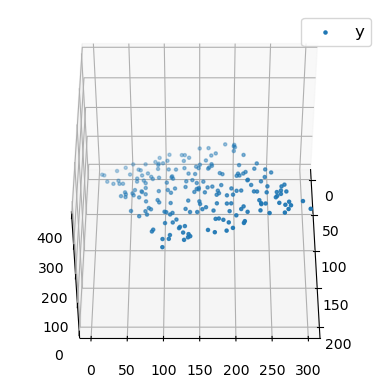

In [197]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
def generate_dataset(n):
    x = []
    y = []
    random_x1 = np.random.rand()
    random_x2 = np.random.rand()
    for i in range(n):
        x1 = i
        x2 = i/2 + np.random.rand()*n
        x.append([1, x1, x2])
        y.append(random_x1 * x1 + random_x2 * x2 + 1)
    return np.array(x), np.array(y)
 
x, y = generate_dataset(200)
 
mpl.rcParams['legend.fontsize'] = 12
 
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)
 
plt.show()

# Time Series 

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [267]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [268]:
import sklearn
from sklearn.metrics import mean_squared_error

In [269]:

data = pd.read_csv("/Users/ms/Desktop/Boot Camp /3rd Project/Bike-Sharing-Dataset/day.csv" )


In [270]:
data['dteday'] = pd.to_datetime(data['dteday']).dt.to_period('d') # Converting the Order Date to month-Year format


In [271]:
# Group the data by  Date for sum of count
data1 = data.groupby(['dteday'])['cnt'].sum()
#data1

In [272]:
data1 = pd.DataFrame(data1) # Convert to data frame


In [273]:
data1.index = data1.index.to_timestamp() # Converting the index to timestamp


In [274]:
data1.index.dtype


dtype('<M8[ns]')

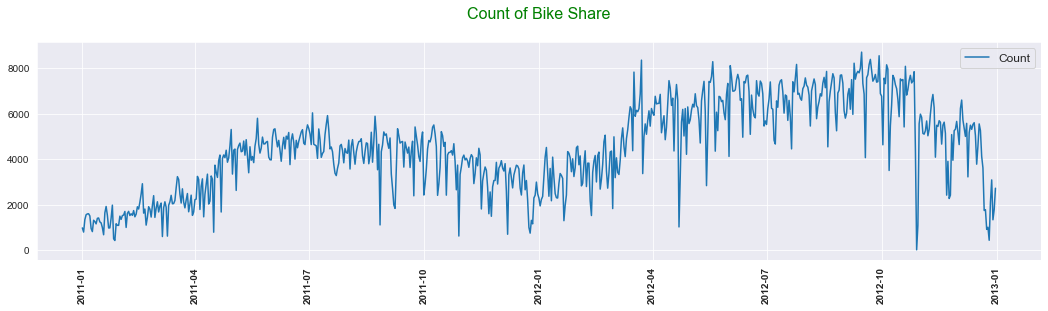

In [275]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Count')
plt.legend(loc='best')
plt.title('Count of Bike Share\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

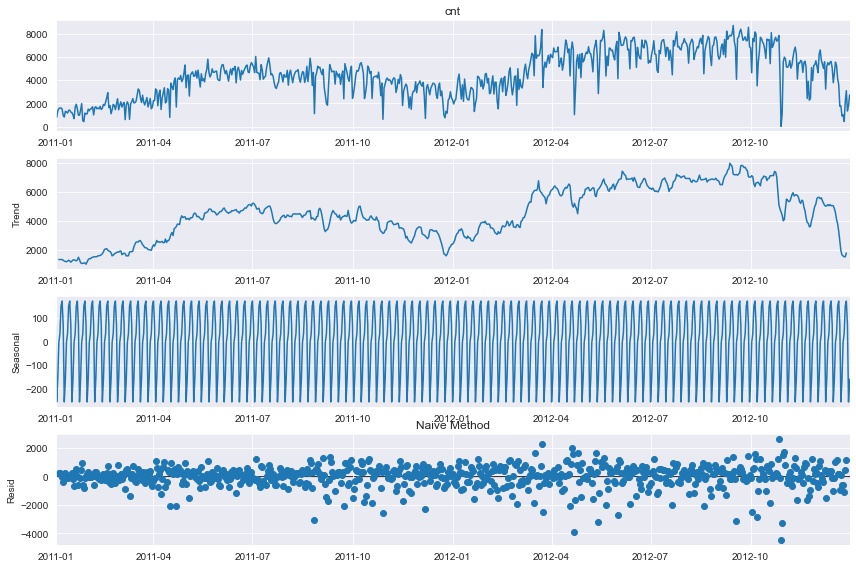

In [331]:
#Additive seasonal decomposition

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(data1.cnt, model='additive') # additive seasonal index

fig = decomposition.plot()

plt.show()

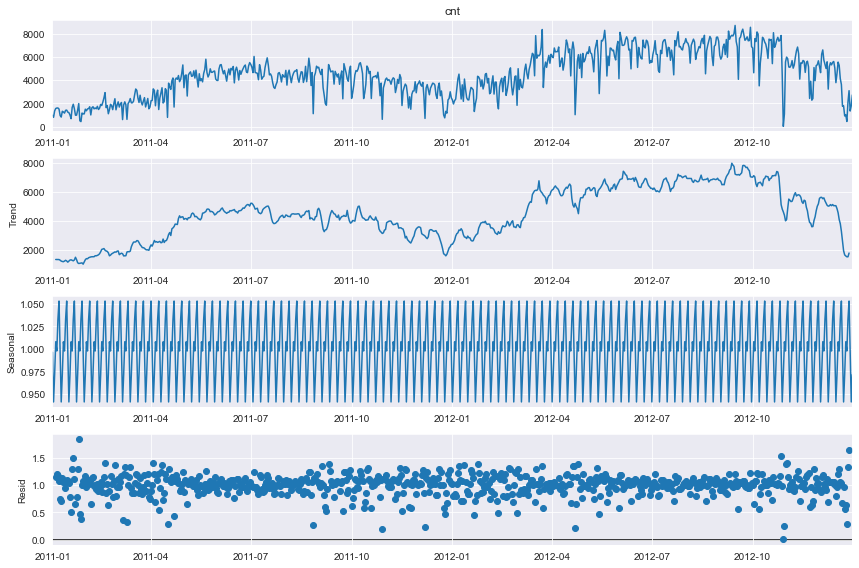

In [277]:
#Multiplicative seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(data1.cnt, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [301]:
# Build and Evaluate Time Series Forecast
# Split the data into train and test sets.

train_len = 650
train = data1[0 : train_len]
test = data1[train_len : ]

## Simple time series methods
***Naive method***

In [314]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['cnt'][train_len-1]

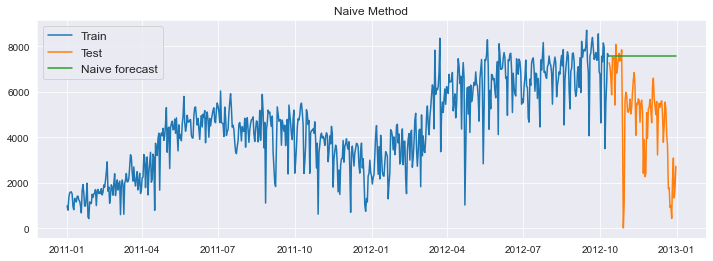

In [315]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['cnt'], label='Train')
plt.plot(test['cnt'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [316]:
# Calculate RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['cnt'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['cnt']-y_hat_naive['naive_forecast'])/test['cnt'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3218.17,531.92


***Simple average method***

In [317]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['cnt'].mean()


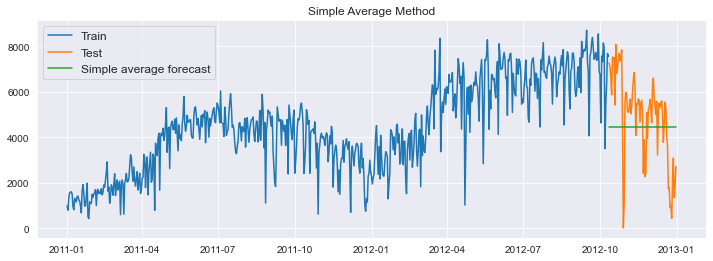

In [318]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['cnt'], label='Train')
plt.plot(test['cnt'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()


In [319]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['cnt'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['cnt']-y_hat_avg['avg_forecast'])/test['cnt'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,3218.17,531.92
0,Simple average method,1958.81,305.04


***Simple moving average method***

In [321]:
y_hat_sma = data1.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data1['cnt'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

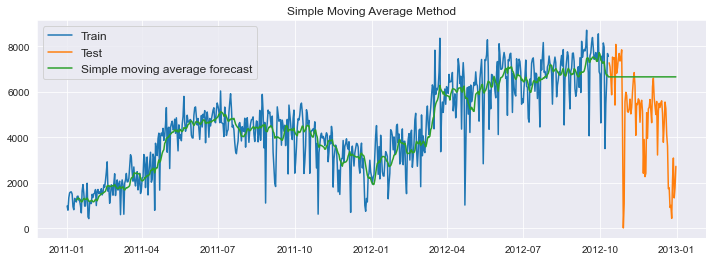

In [323]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['cnt'], label='Train')
plt.plot(test['cnt'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [324]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['cnt'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['cnt']-y_hat_sma['sma_forecast'][train_len:])/test['cnt'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3218.17,531.92
0,Simple average method,1958.81,305.04
0,Simple moving average forecast,2540.99,459.39


## Auto regressive integrated moving average (ARIMA)

